In [1]:
import json
import requests

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2021100100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/laurathriftwood',
    'From': 'lwood3@uw.edu'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    return response

In [5]:
def write_json(output, file_name):
    print(file_name)
    with open(file_name, 'w+') as outfile:
        json.dump(output, outfile)
        print(" written successfully")

In [6]:
# Legacy PageCounts API calls

# desktop traffic
monthly_legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)

# mobile traffic
monthly_legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)

In [7]:
# Write Legacy PageCounts to file
write_json(monthly_legacy_desktop, 'pagecounts_desktop_200801-201607.json')
write_json(monthly_legacy_mobile, 'pagecounts_mobile_200801-201607.json')

pagecounts_desktop_200801-201607.json
 written successfully
pagecounts_mobile_200801-201607.json
 written successfully


In [8]:
# PageViews API calls

# desktop traffic
monthly_pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)

# mobile-web traffic
monthly_pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

# mobile-app traffic
monthly_pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

In [9]:
# Write PageViews to file
write_json(monthly_pageviews_desktop, 'pageviews_desktop_201507-202109.json')
write_json(monthly_pageviews_mobile_web, 'pageviews_mobile-web_201507-202109.json')
write_json(monthly_pageviews_mobile_app, 'pageviews_mobile-app_201507-202109.json')

pageviews_desktop_201507-202109.json
 written successfully
pageviews_mobile-web_201507-202109.json
 written successfully
pageviews_mobile-app_201507-202109.json
 written successfully


In [10]:
import pandas as pd
import math

In [11]:
#read in Legacy data from json files
df_monthly_legacy_desktop = pd.read_json('pagecounts_desktop_200801-201607.json')
df_monthly_legacy_mobile = pd.read_json('pagecounts_mobile_200801-201607.json')

In [12]:
#unnest Legacy data into dataframe
df_monthly_legacy_desktop = pd.json_normalize(df_monthly_legacy_desktop['items'])
df_monthly_legacy_mobile = pd.json_normalize(df_monthly_legacy_mobile['items'])

In [13]:
#read in PageViews data from json files
df_monthly_pageviews_desktop = pd.read_json('pageviews_desktop_201507-202109.json')
df_monthly_pageviews_mobile_web = pd.read_json('pageviews_mobile-web_201507-202109.json')
df_monthly_pageviews_mobile_app = pd.read_json('pageviews_mobile-app_201507-202109.json')

In [14]:
#unnest PageViews data into dataframe
df_monthly_pageviews_desktop = pd.json_normalize(df_monthly_pageviews_desktop['items'])
df_monthly_pageviews_mobile_web = pd.json_normalize(df_monthly_pageviews_mobile_web['items'])
df_monthly_pageviews_mobile_app = pd.json_normalize(df_monthly_pageviews_mobile_app['items'])

In [15]:
#drop unnecessary columns from Legacy data

In [16]:
legacy_columns = ['project', 'granularity']

In [17]:
df_monthly_legacy_desktop = df_monthly_legacy_desktop.drop(columns = legacy_columns, axis=1)

In [18]:
df_monthly_legacy_mobile = df_monthly_legacy_mobile.drop(columns = legacy_columns, axis=1)

In [19]:
#rename legacy headers
df_monthly_legacy_desktop = df_monthly_legacy_desktop.rename(columns={'access-site': 'access', 'count': 'num_views'})

In [20]:
#rename legacy headers
df_monthly_legacy_mobile = df_monthly_legacy_mobile.rename(columns={'access-site': 'access', 'count': 'num_views'})

In [21]:
df_monthly_legacy_desktop

,access,timestamp,num_views
0,desktop-site,2008010100,4930902570
1,desktop-site,2008020100,4818393763
2,desktop-site,2008030100,4955405809
3,desktop-site,2008040100,5159162183
4,desktop-site,2008050100,5584691092
...,...,...,...
98,desktop-site,2016030100,5407676056
99,desktop-site,2016040100,5572235399
100,desktop-site,2016050100,5330532334
101,desktop-site,2016060100,4975092447


In [22]:
#rename access for legacy desktop views
df_monthly_legacy_desktop = df_monthly_legacy_desktop.replace(to_replace = ['desktop-site'], value = 'pagecount_desktop_views')

In [23]:
#rename access for legacy mobile views
df_monthly_legacy_mobile = df_monthly_legacy_mobile.replace(to_replace = ['mobile-site'], value = 'pagecount_mobile_views')

In [24]:
#drop unnecessary columns from desktop PageViews
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.drop(df_monthly_pageviews_desktop.columns[[0, 2, 3]], axis=1)

In [25]:
#rename access for pageviews desktop
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.replace(to_replace = ['desktop'], value = 'pageview_desktop_views')

In [26]:
#rename column header
df_monthly_pageviews_desktop = df_monthly_pageviews_desktop.rename(columns={'views': 'num_views'})

In [27]:
#For data collected from the Pageviews API, combine the monthly values for
# mobile-app and mobile-web to create a total mobile traffic count for each month.

In [28]:
#merge the two PageViews mobile using inner join
merged = pd.merge(left=df_monthly_pageviews_mobile_web, 
                       right=df_monthly_pageviews_mobile_app,
                       left_on='timestamp', 
                       right_on='timestamp')

In [29]:
#sum the views for the two mobile access types
merged['num_views'] = merged['views_x'] + merged['views_y']

In [30]:
#add a column for access type for combined views
merged['access'] = 'pageview_mobile_views'

In [31]:
df_monthly_pageviews_mobile_combined = merged.copy()

In [32]:
#drop unnecessary columns from combined mobile PageViews
df_monthly_pageviews_mobile_combined = merged.drop(merged.columns[[0, 1, 2, 3, 5, 6, 7, 8, 9, 10]], 
                                                                                 axis=1)

In [33]:
print(df_monthly_legacy_desktop.shape)
print(df_monthly_legacy_mobile.shape)
print(df_monthly_pageviews_desktop.shape)
print(df_monthly_pageviews_mobile_combined.shape)

(103, 3)
(22, 3)
(75, 3)
(75, 3)


In [34]:
df_monthly_legacy_desktop

,access,timestamp,num_views
0,pagecount_desktop_views,2008010100,4930902570
1,pagecount_desktop_views,2008020100,4818393763
2,pagecount_desktop_views,2008030100,4955405809
3,pagecount_desktop_views,2008040100,5159162183
4,pagecount_desktop_views,2008050100,5584691092
...,...,...,...
98,pagecount_desktop_views,2016030100,5407676056
99,pagecount_desktop_views,2016040100,5572235399
100,pagecount_desktop_views,2016050100,5330532334
101,pagecount_desktop_views,2016060100,4975092447


In [35]:
df_monthly_legacy_mobile

,access,timestamp,num_views
0,pagecount_mobile_views,2014100100,3091546685
1,pagecount_mobile_views,2014110100,3027489668
2,pagecount_mobile_views,2014120100,3278950021
3,pagecount_mobile_views,2015010100,3485302091
4,pagecount_mobile_views,2015020100,3091534479
5,pagecount_mobile_views,2015030100,3330832588
6,pagecount_mobile_views,2015040100,3222089917
7,pagecount_mobile_views,2015050100,3334069483
8,pagecount_mobile_views,2015060100,3038162463
9,pagecount_mobile_views,2015070100,3254472695


In [36]:
#For all data, separate the value of timestamp into four-digit year (YYYY) and two-digit
#month (MM) and discard values for day and hour (DDHH).

In [37]:
#combine all dataframes

In [38]:
#combine all dataframes
all_data = [df_monthly_legacy_desktop, 
            df_monthly_legacy_mobile, 
            df_monthly_pageviews_desktop, 
            df_monthly_pageviews_mobile_combined]

In [39]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index = True, keys=['pagecount_desktop_views', 
                                                    'pagecount_mobile_views', 
                                                   'pageview_desktop_views', 
                                                   'pageview_mobile_views'])

In [40]:
all_data_concat

,access,timestamp,num_views
0,pagecount_desktop_views,2008010100,4930902570
1,pagecount_desktop_views,2008020100,4818393763
2,pagecount_desktop_views,2008030100,4955405809
3,pagecount_desktop_views,2008040100,5159162183
4,pagecount_desktop_views,2008050100,5584691092
...,...,...,...
270,pageview_mobile_views,2021050100,4976579558
271,pageview_mobile_views,2021060100,4584510417
272,pageview_mobile_views,2021070100,4778909421
273,pageview_mobile_views,2021080100,4732194000


In [41]:
all_data_concat['timestamp'] = all_data_concat['timestamp'].astype(str)

In [42]:
all_data_concat['year'] = all_data_concat['timestamp'].str[0:4]
all_data_concat['month'] = all_data_concat['timestamp'].str[4:6]

In [43]:
all_data_concat

,access,timestamp,num_views,year,month
0,pagecount_desktop_views,2008010100,4930902570,2008,01
1,pagecount_desktop_views,2008020100,4818393763,2008,02
2,pagecount_desktop_views,2008030100,4955405809,2008,03
3,pagecount_desktop_views,2008040100,5159162183,2008,04
4,pagecount_desktop_views,2008050100,5584691092,2008,05
...,...,...,...,...,...
270,pageview_mobile_views,2021050100,4976579558,2021,05
271,pageview_mobile_views,2021060100,4584510417,2021,06
272,pageview_mobile_views,2021070100,4778909421,2021,07
273,pageview_mobile_views,2021080100,4732194000,2021,08


In [44]:
#need to combine rows where months and days align

In [45]:
all_data_concat_save = all_data_concat.copy() 

In [46]:
all_data_concat['pagecount_desktop_views'] = all_data_concat.loc[all_data_concat['access'] == 'pagecount_desktop_views', 'num_views']
all_data_concat['pagecount_mobile_views'] = all_data_concat.loc[all_data_concat['access'] == 'pagecount_mobile_views', 'num_views']
all_data_concat['pageview_desktop_views'] = all_data_concat.loc[all_data_concat['access'] == 'pageview_desktop_views', 'num_views']
all_data_concat['pageview_mobile_views'] = all_data_concat.loc[all_data_concat['access'] == 'pageview_mobile_views', 'num_views']

In [47]:
all_data_concat = all_data_concat.fillna(0)

In [48]:
all_data_concat

,access,timestamp,num_views,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,pagecount_desktop_views,2008010100,4930902570,2008,01,4.930903e+09,0.0,0.0,0.000000e+00
1,pagecount_desktop_views,2008020100,4818393763,2008,02,4.818394e+09,0.0,0.0,0.000000e+00
2,pagecount_desktop_views,2008030100,4955405809,2008,03,4.955406e+09,0.0,0.0,0.000000e+00
3,pagecount_desktop_views,2008040100,5159162183,2008,04,5.159162e+09,0.0,0.0,0.000000e+00
4,pagecount_desktop_views,2008050100,5584691092,2008,05,5.584691e+09,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...
270,pageview_mobile_views,2021050100,4976579558,2021,05,0.000000e+00,0.0,0.0,4.976580e+09
271,pageview_mobile_views,2021060100,4584510417,2021,06,0.000000e+00,0.0,0.0,4.584510e+09
272,pageview_mobile_views,2021070100,4778909421,2021,07,0.000000e+00,0.0,0.0,4.778909e+09
273,pageview_mobile_views,2021080100,4732194000,2021,08,0.000000e+00,0.0,0.0,4.732194e+09


In [49]:
all_data_concat_save1 = all_data_concat.copy()

In [50]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0, 2]], axis = 1)

In [51]:
all_data_concat

,timestamp,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2008010100,2008,01,4.930903e+09,0.0,0.0,0.000000e+00
1,2008020100,2008,02,4.818394e+09,0.0,0.0,0.000000e+00
2,2008030100,2008,03,4.955406e+09,0.0,0.0,0.000000e+00
3,2008040100,2008,04,5.159162e+09,0.0,0.0,0.000000e+00
4,2008050100,2008,05,5.584691e+09,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...
270,2021050100,2021,05,0.000000e+00,0.0,0.0,4.976580e+09
271,2021060100,2021,06,0.000000e+00,0.0,0.0,4.584510e+09
272,2021070100,2021,07,0.000000e+00,0.0,0.0,4.778909e+09
273,2021080100,2021,08,0.000000e+00,0.0,0.0,4.732194e+09


In [52]:
#is it summing the right thing?
#num_views is the sum of the two legacy counts
#also group by year month?
#or parse later from index
all_data_concat = all_data_concat.groupby(['timestamp']).sum().reset_index()

In [53]:
all_data_concat

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views
0,2008010100,4.930903e+09,0.0,0.000000e+00,0.000000e+00
1,2008020100,4.818394e+09,0.0,0.000000e+00,0.000000e+00
2,2008030100,4.955406e+09,0.0,0.000000e+00,0.000000e+00
3,2008040100,5.159162e+09,0.0,0.000000e+00,0.000000e+00
4,2008050100,5.584691e+09,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...
160,2021050100,0.000000e+00,0.0,2.824416e+09,4.976580e+09
161,2021060100,0.000000e+00,0.0,2.505971e+09,4.584510e+09
162,2021070100,0.000000e+00,0.0,2.765584e+09,4.778909e+09
163,2021080100,0.000000e+00,0.0,2.763414e+09,4.732194e+09


In [54]:
all_data_concat['timestamp'] = all_data_concat['timestamp'].astype(str)

In [55]:
all_data_concat['year'] = all_data_concat['timestamp'].str[0:4]
all_data_concat['month'] = all_data_concat['timestamp'].str[4:6]

In [56]:
all_data_concat

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,year,month
0,2008010100,4.930903e+09,0.0,0.000000e+00,0.000000e+00,2008,01
1,2008020100,4.818394e+09,0.0,0.000000e+00,0.000000e+00,2008,02
2,2008030100,4.955406e+09,0.0,0.000000e+00,0.000000e+00,2008,03
3,2008040100,5.159162e+09,0.0,0.000000e+00,0.000000e+00,2008,04
4,2008050100,5.584691e+09,0.0,0.000000e+00,0.000000e+00,2008,05
...,...,...,...,...,...,...,...
160,2021050100,0.000000e+00,0.0,2.824416e+09,4.976580e+09,2021,05
161,2021060100,0.000000e+00,0.0,2.505971e+09,4.584510e+09,2021,06
162,2021070100,0.000000e+00,0.0,2.765584e+09,4.778909e+09,2021,07
163,2021080100,0.000000e+00,0.0,2.763414e+09,4.732194e+09,2021,08


In [57]:
#add all view columns
all_data_concat['pagecount_all_views'] = all_data_concat['pagecount_desktop_views'] + all_data_concat['pagecount_mobile_views']
all_data_concat['pageview_all_views'] = all_data_concat['pageview_desktop_views'] + all_data_concat['pageview_mobile_views']

In [58]:
all_data_concat

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,year,month,pagecount_all_views,pageview_all_views
0,2008010100,4.930903e+09,0.0,0.000000e+00,0.000000e+00,2008,01,4.930903e+09,0.000000e+00
1,2008020100,4.818394e+09,0.0,0.000000e+00,0.000000e+00,2008,02,4.818394e+09,0.000000e+00
2,2008030100,4.955406e+09,0.0,0.000000e+00,0.000000e+00,2008,03,4.955406e+09,0.000000e+00
3,2008040100,5.159162e+09,0.0,0.000000e+00,0.000000e+00,2008,04,5.159162e+09,0.000000e+00
4,2008050100,5.584691e+09,0.0,0.000000e+00,0.000000e+00,2008,05,5.584691e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...
160,2021050100,0.000000e+00,0.0,2.824416e+09,4.976580e+09,2021,05,0.000000e+00,7.800996e+09
161,2021060100,0.000000e+00,0.0,2.505971e+09,4.584510e+09,2021,06,0.000000e+00,7.090482e+09
162,2021070100,0.000000e+00,0.0,2.765584e+09,4.778909e+09,2021,07,0.000000e+00,7.544494e+09
163,2021080100,0.000000e+00,0.0,2.763414e+09,4.732194e+09,2021,08,0.000000e+00,7.495608e+09


In [59]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0]], axis=1)

In [60]:
all_data_concat

,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_views,year,month,pagecount_all_views,pageview_all_views
0,4.930903e+09,0.0,0.000000e+00,0.000000e+00,2008,01,4.930903e+09,0.000000e+00
1,4.818394e+09,0.0,0.000000e+00,0.000000e+00,2008,02,4.818394e+09,0.000000e+00
2,4.955406e+09,0.0,0.000000e+00,0.000000e+00,2008,03,4.955406e+09,0.000000e+00
3,5.159162e+09,0.0,0.000000e+00,0.000000e+00,2008,04,5.159162e+09,0.000000e+00
4,5.584691e+09,0.0,0.000000e+00,0.000000e+00,2008,05,5.584691e+09,0.000000e+00
...,...,...,...,...,...,...,...,...
160,0.000000e+00,0.0,2.824416e+09,4.976580e+09,2021,05,0.000000e+00,7.800996e+09
161,0.000000e+00,0.0,2.505971e+09,4.584510e+09,2021,06,0.000000e+00,7.090482e+09
162,0.000000e+00,0.0,2.765584e+09,4.778909e+09,2021,07,0.000000e+00,7.544494e+09
163,0.000000e+00,0.0,2.763414e+09,4.732194e+09,2021,08,0.000000e+00,7.495608e+09


In [61]:
#reorder columns
all_data_concat = all_data_concat[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']]

In [62]:
#all_data_concat.to_csv(r'test_output.csv', index = False, header = True)

In [63]:
#output to file
all_data_concat.to_csv(r'en-wikipedia_traffic_200712-202108.csv', index = False, header = True)

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:>

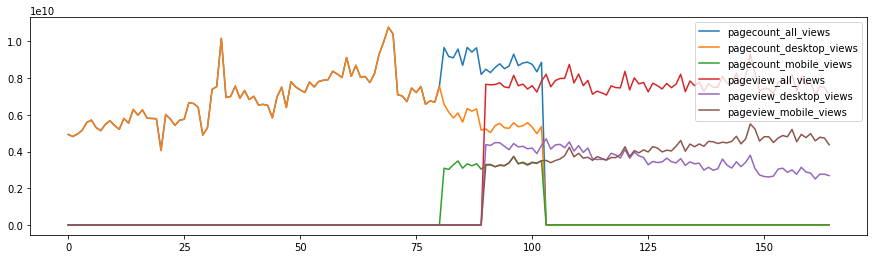

In [65]:
all_data_concat.plot(figsize=(15,4))
#all_data_concat.plot(subplots=False, figsize=(15,6))
#all_data_concat.plot(y=["R", "F10.7"], figsize=(15,4))